# IS 362 – Preprocessing Data for scikit-learn
## Mushroom Dataset – Edible vs Poisonous

This notebook loads the classic mushroom dataset from the UCI repository, selects a few columns, 
renames them, converts the categorical values into numeric codes, and does some simple 
exploratory data analysis (EDA) to prepare for a later scikit-learn project.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 5)


In [10]:
import pandas as pd

mushroom = pd.read_csv(r"C:\Users\htete\Downloads\mushroom\agaricus-lepiota.data", header=None)
mushroom.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
column_names = [
    "class","cap_shape","cap_surface","cap_color","bruises","odor",
    "gill_attachment","gill_spacing","gill_size","gill_color",
    "stalk_shape","stalk_root",
    "stalk_surface_above_ring","stalk_surface_below_ring",
    "stalk_color_above_ring","stalk_color_below_ring",
    "veil_type","veil_color",
    "ring_number","ring_type",
    "spore_print_color","population","habitat"
]

mushroom.columns = column_names


In [12]:
mushroom.head()


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
df = mushroom[["class", "odor", "gill_color"]].copy()
df.head()


,class,odor,gill_color
0,p,p,k
1,e,a,k
2,e,l,n
3,p,p,n
4,e,n,k


In [14]:
df = df.rename(columns={"class": "is_poisonous"})


In [15]:
df["is_poisonous"] = df["is_poisonous"].map({"e":0, "p":1})
df["odor_code"] = df["odor"].astype("category").cat.codes
df["gill_color_code"] = df["gill_color"].astype("category").cat.codes


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,4)


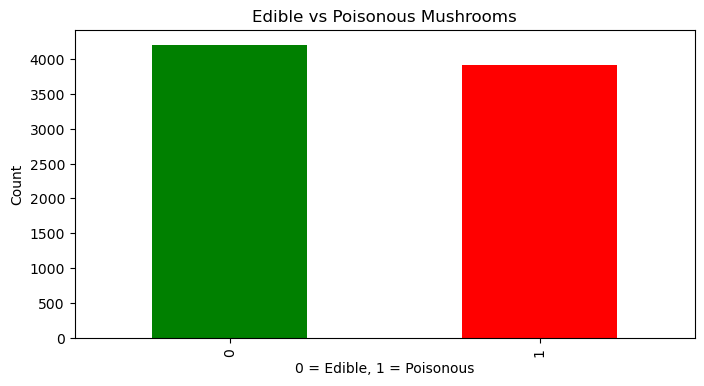

In [17]:
df["is_poisonous"].value_counts().plot(
    kind="bar",
    title="Edible vs Poisonous Mushrooms",
    color=["green", "red"]
)
plt.xlabel("0 = Edible, 1 = Poisonous")
plt.ylabel("Count")
plt.show()


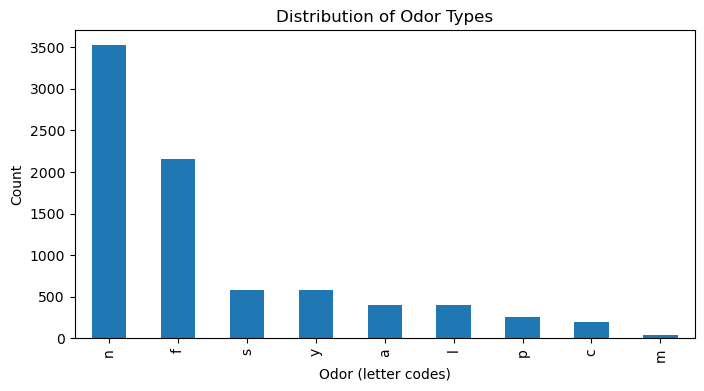

In [18]:
df["odor"].value_counts().plot(
    kind="bar",
    title="Distribution of Odor Types"
)
plt.xlabel("Odor (letter codes)")
plt.ylabel("Count")
plt.show()


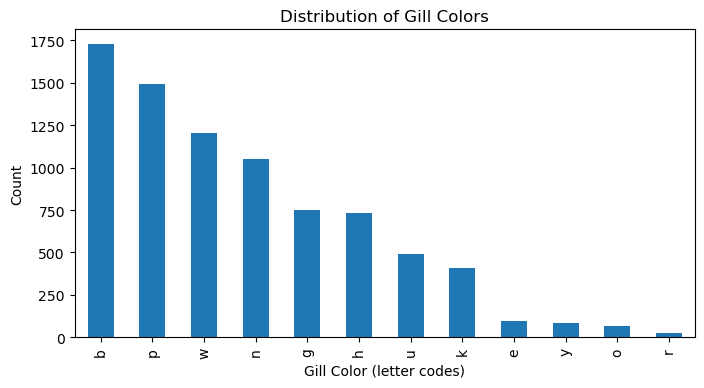

In [19]:
df["gill_color"].value_counts().plot(
    kind="bar",
    title="Distribution of Gill Colors"
)
plt.xlabel("Gill Color (letter codes)")
plt.ylabel("Count")
plt.show()


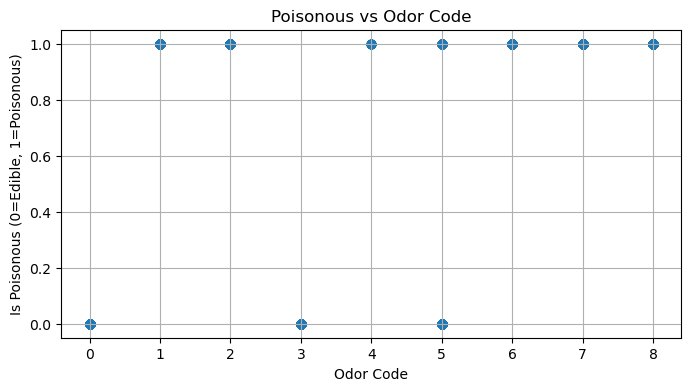

In [20]:
plt.scatter(df["odor_code"], df["is_poisonous"], alpha=0.5)
plt.title("Poisonous vs Odor Code")
plt.xlabel("Odor Code")
plt.ylabel("Is Poisonous (0=Edible, 1=Poisonous)")
plt.grid(True)
plt.show()


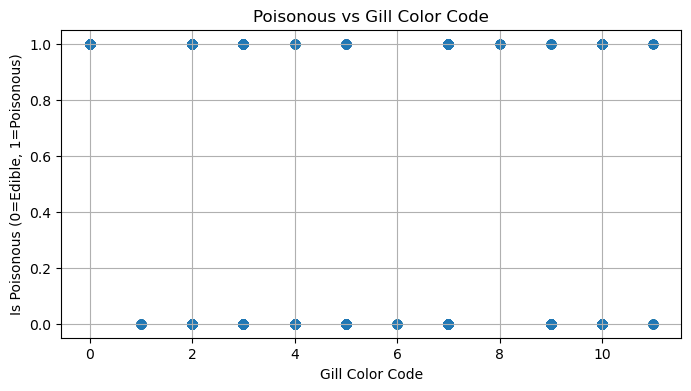

In [21]:
plt.scatter(df["gill_color_code"], df["is_poisonous"], alpha=0.5)
plt.title("Poisonous vs Gill Color Code")
plt.xlabel("Gill Color Code")
plt.ylabel("Is Poisonous (0=Edible, 1=Poisonous)")
plt.grid(True)
plt.show()


### Conclusion

After preprocessing and analyzing the mushroom dataset, the scatterplots show that **odor** is a very strong indicator of whether a mushroom is poisonous or edible. Certain odor categories appear almost exclusively in poisonous mushrooms. Gill color shows weaker patterns but still provides some separation between edible and poisonous groups.

These preprocessing steps successfully turned categorical letters into numeric codes and produced visualizations that help understand which features are most useful for classification. The dataset is now ready for use in scikit-learn for building a prediction model.
